In [95]:
import json
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = [12, 8]


In [28]:
raw_0 = open('raw_0.txt', 'r')
raw_1 = open('raw_1.txt', 'w')

for line in raw_0:
    try:
        line = line.replace('"', '|').replace("'", '"').strip()
        message = json.loads(line)
        
        msg = ['date', 'subject']
        for header in message:
            if header['name'] == 'Subject':
                msg[1] = header['value'].replace("Noto", "").replace("[", "").replace("]", "").replace(",", " ").strip()
            if header['name'] == 'Date':
                msg[0] = header['value'].split(",")[-1].strip()
        raw_1.write("{}\n".format(",".join(msg)))
        print(msg)
    except json.JSONDecodeError as e:
        continue

raw_0.close()
raw_1.close()

['8 Oct 2019 07:45:52 -0400', '买']
['7 Oct 2019 19:44:33 -0400', 'Sebastian']
['7 Oct 2019 19:38:34 -0400', '苹果李']
['7 Oct 2019 19:38:26 -0400', '苹果']
['6 Oct 2019 21:35:13 -0400', '蜗牛']
['6 Oct 2019 20:08:10 -0400', 'Purple']
['6 Oct 2019 19:54:29 -0400', '们']
['6 Oct 2019 19:24:59 -0400', 'Sorry']
['6 Oct 2019 19:24:57 -0400', 'Song']
['6 Oct 2019 08:44:40 -0400', '汤']
['6 Oct 2019 08:44:15 -0400', '鼻涕']
['6 Oct 2019 01:04:06 -0400', '吸管']
['5 Oct 2019 16:58:50 -0400', 'There']
['5 Oct 2019 16:58:49 -0400', 'Right']
['5 Oct 2019 16:17:15 -0400', 'straw']
['5 Oct 2019 16:08:19 -0400', 'Panera']
['5 Oct 2019 15:13:36 -0400', '钥匙']
['5 Oct 2019 15:02:05 -0400', 'Elmo']
['5 Oct 2019 15:02:01 -0400', '南瓜']
['5 Oct 2019 15:02:08 -0400', '歌']
['5 Oct 2019 14:55:50 -0400', 'Is']
['5 Oct 2019 14:55:49 -0400', 'Where']
['5 Oct 2019 14:55:42 -0400', '没有']
['5 Oct 2019 12:14:45 -0400', '干']
['5 Oct 2019 12:14:45 -0400', '不客气']
['5 Oct 2019 10:23:31 -0400', '已经']
['5 Oct 2019 07:46:45 -0400', '不行

['21 Jan 2018 06:08:05 -0800', 'Santa']
['20 Jan 2018 17:41:47 -0800', 'Huan (change)']
['20 Jan 2018 17:39:52 -0800', 'Chu Qu']
['20 Jan 2018 16:45:15 -0800', 'Pi gu']
['20 Jan 2018 16:45:12 -0800', 'Buo zi']
['20 Jan 2018 16:44:58 -0800', 'Busy']
['20 Jan 2018 16:44:55 -0800', 'Toddler']
['20 Jan 2018 16:36:17 -0800', 'Zang (dirty)']
['20 Jan 2018 16:36:11 -0800', 'Corduroy']
['20 Jan 2018 16:36:08 -0800', 'Bang']
['20 Jan 2018 12:52:23 -0800', 'La zhu']
['20 Jan 2018 12:52:20 -0800', 'Candle']
['20 Jan 2018 12:44:54 -0800', 'Bang sho (helper)']
['20 Jan 2018 04:54:02 -0800', 'Snowman']
['20 Jan 2018 04:53:58 -0800', 'Snow']
['20 Jan 2018 04:20:51 -0800', 'Tang (sugar)']
['20 Jan 2018 04:20:45 -0800', 'Pie']
['19 Jan 2018 18:10:49 -0500', 'Xia Yi ci (next time)']
['19 Jan 2018 09:37:31 -0500', 'Tai duo']
['18 Jan 2018 20:18:48 -0500', 'Ku zi']
['18 Jan 2018 20:18:39 -0500', 'Hai zi']
['18 Jan 2018 19:43:47 -0500', 'Right']
['18 Jan 2018 19:43:44 -0500', 'Left']
['18 Jan 2018 19:43:40

In [84]:
# Split into two files, add 'date,word'
# Clean timezone information
# TODO: modify original data collection script...

raw_1_lucas = open('raw_1_lucas.txt', 'r')
raw_1_charlie = open('raw_1_charlie.txt', 'r')

lucas = pd.read_csv(raw_1_lucas).iloc[::-1].reset_index()
charlie = pd.read_csv(raw_1_charlie).iloc[::-1].reset_index()

lucas.date = pd.to_datetime(lucas.date)
charlie.date = pd.to_datetime(charlie.date)

lucas["months"] = [int(i.days) / 30 for i in lucas.date - datetime.datetime(2016, 2, 12)]
charlie["months"] = [int(i.days) / 30 for i in charlie.date - datetime.datetime(2017, 9, 8)]

lucas["wc"] = lucas.index + 1
charlie["wc"] = charlie.index + 1

In [85]:
lucas

,index,date,word,months,wc
0,1545,2017-06-19 12:38:07,Mama,16.433333,1
1,1544,2017-06-19 12:38:09,Dada,16.433333,2
2,1543,2017-06-19 12:38:11,Baby,16.433333,3
3,1542,2017-06-19 12:38:13,Mommy,16.433333,4
4,1541,2017-06-19 12:38:15,Daddy,16.433333,5
...,...,...,...,...,...
1541,4,2018-05-23 18:24:30,Dressed,27.700000,1542
1542,3,2018-05-23 18:24:36,Avacado,27.700000,1543
1543,2,2018-08-19 21:42:44,Close eyes,30.633333,1544
1544,1,2018-08-19 21:42:48,Front rie,30.633333,1545


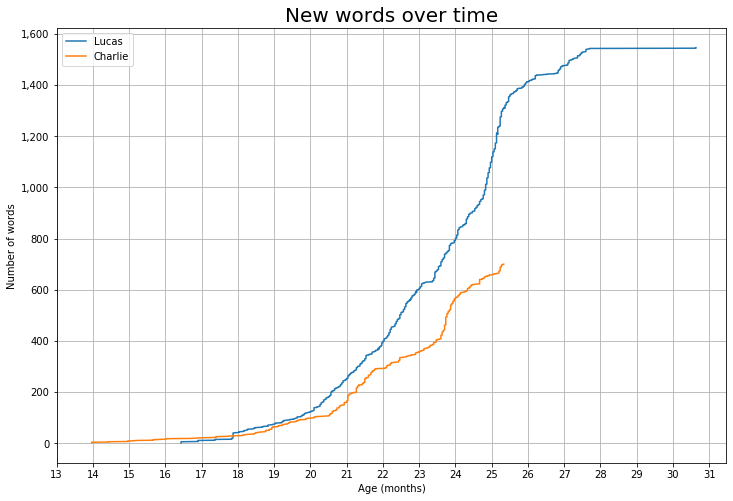

In [105]:
fig, ax = plt.subplots()

plt.plot(lucas.months, lucas.wc, label="Lucas")
plt.plot(charlie.months, charlie.wc, label="Charlie")
plt.title("New words over time", fontsize=20)
plt.xlabel("Age (months)")
plt.ylabel("Number of words")
plt.xticks(np.arange(13, 32, step=1))
plt.legend()
plt.grid(b=True, which='major', axis='both')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))

AttributeError: 'function' object has no attribute 'shape'